In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
os.chdir(r"C:\Users\kaborg15\Python_projects\Vibrent_Style_Quiz_Generation")

import pandas as pd
from resources.constants import *
from src import load_dataframes

OUTFIT_EMBEDDINGS_DF_PATH = r"resources\data\outfit_embeddings_df.pkl"
REPRESENTATION_COLUMN = "outfit_embeddings"

pictures_df = pd.read_csv(PICTURE_TRIPLETS_CSV_PATH, sep=CSV_SEPARATOR)
user_triplets_df = pd.read_csv(USER_ACTIVITY_TRIPLETS_CSV_PATH, sep=CSV_SEPARATOR)

embeddings_df = pd.read_pickle(OUTFIT_EMBEDDINGS_DF_PATH)

In [3]:
import numpy as np

input_embeddings = np.stack(embeddings_df[REPRESENTATION_COLUMN].values)

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(input_embeddings, 'ward', metric='euclidean')




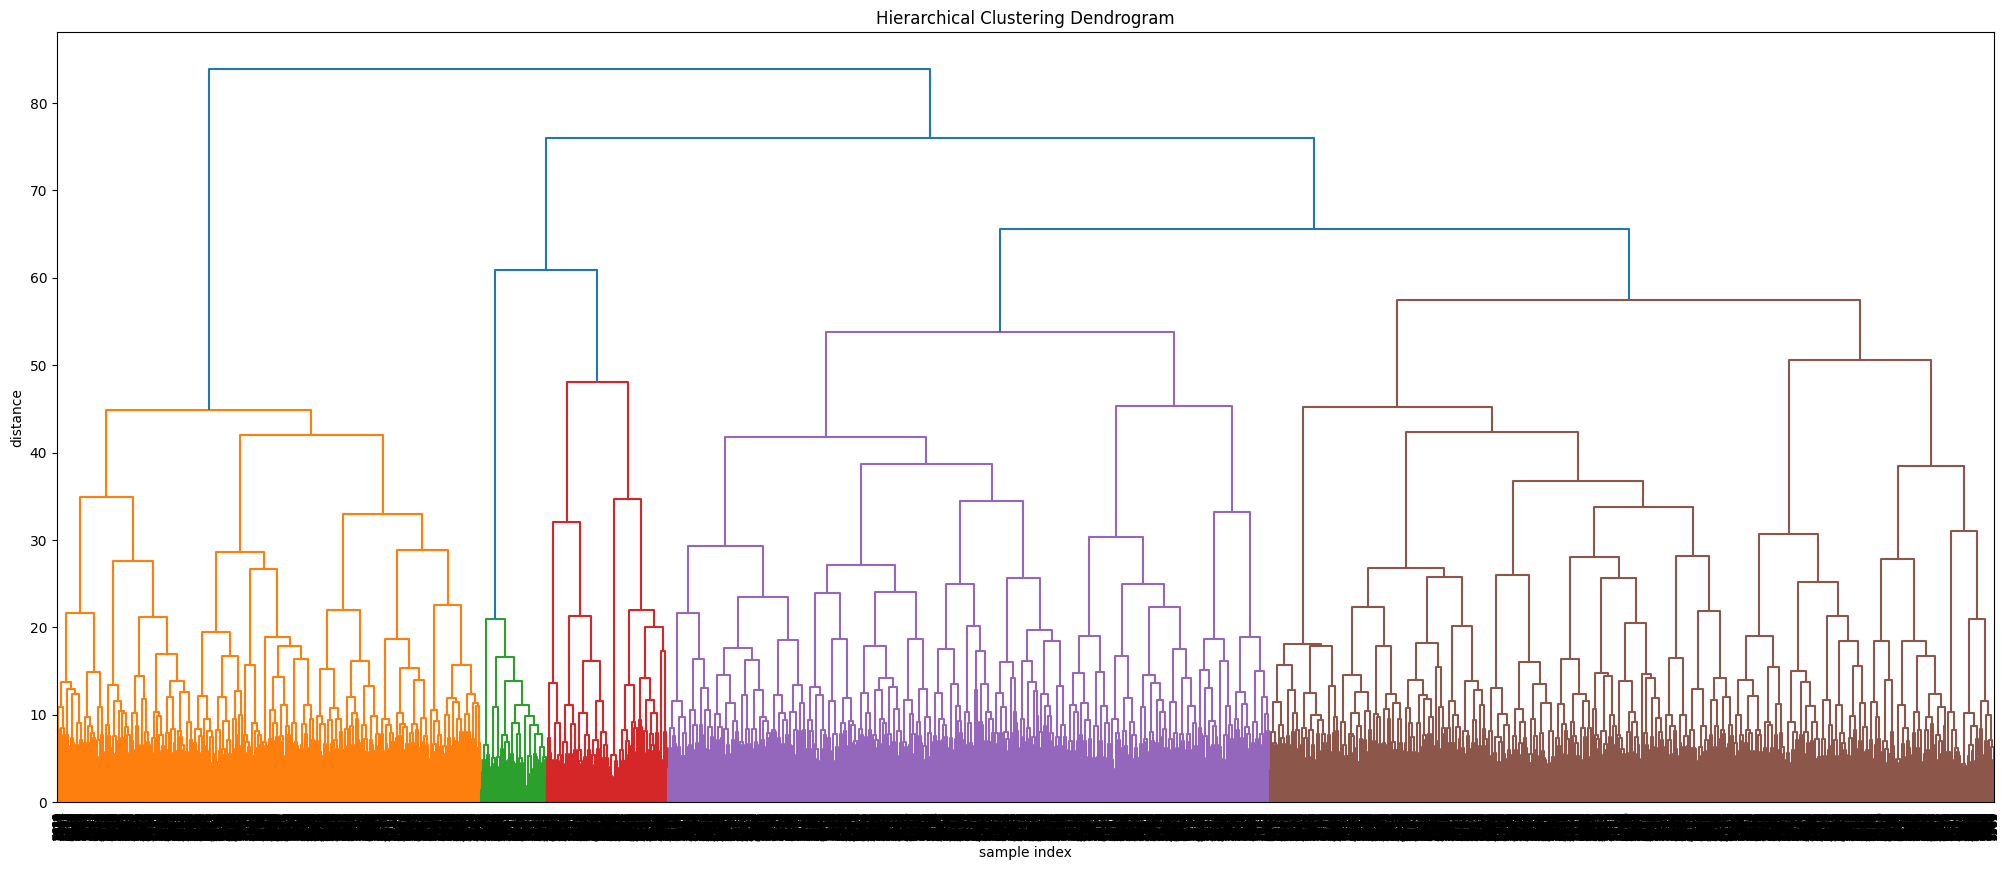

In [10]:

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [25]:
for row in Z:
    num_0, num_1, distance, num_2 = row
    if not num_0.is_integer() or not num_1.is_integer() or not num_2.is_integer():
        raise ValueError("Not integer")
    
    num_0, num_1, num_2 = int(num_0), int(num_1), int(num_2)
    print(f"{num_0} {num_1} {distance} {num_2}")

527 6573 0.0 2
3264 9066 0.0 2
9204 9792 0.0 3
9756 9793 0.0 4
4547 7255 0.0 2
1352 3588 0.0 2
2042 5593 0.0 2
5274 6515 0.0 2
23 7791 0.0 2
824 6966 0.0 2
915 2657 0.0 2
7195 9801 0.0 3
5934 8968 0.0 2
1370 1884 0.0 2
3484 9804 0.0 3
4765 9805 0.0 4
7669 7917 0.0 2
1972 9230 0.0 2
1817 1952 0.0 2
3627 9809 0.0 3
6544 9810 0.0 4
645 994 0.0 2
422 8034 0.0 2
3047 5599 0.0 2
2774 9252 0.0 2
5127 8320 0.0 2
6583 8230 0.0 2
2730 6670 0.0 2
8121 9818 0.0 3
2222 5061 0.0 2
1093 6672 0.0 2
1001 1967 0.0 2
7517 9822 0.0 3
1323 2467 0.0 2
1465 6847 0.0 2
1760 9014 0.0 2
1018 2562 0.0 2
9458 9827 0.0 3
3537 8331 0.0 2
1418 3703 0.0 2
6407 6825 0.0 2
2455 2873 0.0 2
3828 9832 0.0 3
6758 9833 0.0 4
9760 9834 0.0 5
3633 9501 0.0 2
2066 9097 0.0 2
4050 6799 0.0 2
481 7598 0.0 2
672 4153 0.0 2
3665 5252 0.0 2
7020 9841 0.0 3
3360 7266 0.0 2
6705 9127 0.0 2
3914 9026 0.0 2
86 3116 0.0 2
89 7283 0.0 2
1090 1322 0.0 2
3576 4162 0.0 2
2436 8193 0.0 2
3486 4872 0.0 2
1343 3181 0.0 2
7179 9316 0.0 2
853 19

In [26]:
import pandas as pd

z_df = pd.DataFrame(Z, columns=["num_0", "num_1", "distance", "num_2"])

In [47]:
z_df["num_0"].value_counts().sort_index()

num_0
0.0        1
1.0        1
2.0        1
3.0        1
4.0        1
          ..
19567.0    1
19570.0    1
19571.0    1
19575.0    1
19577.0    1
Name: count, Length: 9790, dtype: int64

In [61]:
z_df = z_df.astype({"num_0": int, "num_1": int, "distance": float, "num_2": int})

In [99]:
number_of_embeddings = input_embeddings.shape[0]
cluster_hierarchy = {i : [i] for i in range(number_of_embeddings)}

for index, row in z_df.iterrows():
    index_0, index_1, distance, number_in_cluster = row
    if index_0 in cluster_hierarchy and index_1 in cluster_hierarchy:
        new_cluster_index = number_of_embeddings + index
        cluster_hierarchy[new_cluster_index] = [cluster_hierarchy[index_0], cluster_hierarchy[index_1]]

def count_non_list_elements(nested_list):
    def flatten(lst):
        for item in lst:
            if isinstance(item, list):
                yield from flatten(item)
            else:
                yield item
    
    return sum(1 for _ in flatten(nested_list))


START_INDEX = 19580
NUM_TO_CONVERGENCE = 30
PRINT_CONVERGENCE = False
print(f"starting at index {START_INDEX} with {count_non_list_elements(cluster_hierarchy[START_INDEX])} elements")

current_level = 0
converged_clusters = []
investigate_indexes = [cluster_hierarchy[START_INDEX]]
while len(investigate_indexes) > 0:
    current_level += 1
    number_converged = 0
    print(f"level {current_level} with {len(investigate_indexes)} clusters")

    new_investigate_indexes = []
    for cluster in investigate_indexes:
        if len(cluster) != 2:
            raise ValueError(f"Reaced a leaf node? {cluster}")
        
        cluster_0, cluster_1 = cluster
        length_0 = count_non_list_elements(cluster_0)
        length_1 = count_non_list_elements(cluster_1)

        if length_0 > NUM_TO_CONVERGENCE:
            new_investigate_indexes.append(cluster_0)
        else:
            converged_clusters.append(cluster_0)
            number_converged += 1
            if PRINT_CONVERGENCE:
                print(f"found a cluster with {length_0} elements")
        
        if length_1 > NUM_TO_CONVERGENCE:
            new_investigate_indexes.append(cluster_1)
        else:
            converged_clusters.append(cluster_1)
            number_converged += 1
            if PRINT_CONVERGENCE:
                print(f"found a cluster with {length_1} elements")

    print(f"converged {number_converged} clusters")
    investigate_indexes = new_investigate_indexes

starting at index 19580 with 9791 elements
level 1 with 1 clusters
converged 0 clusters
level 2 with 2 clusters
converged 0 clusters
level 3 with 4 clusters
converged 0 clusters
level 4 with 8 clusters
converged 0 clusters
level 5 with 16 clusters
converged 2 clusters
level 6 with 30 clusters
converged 14 clusters
level 7 with 46 clusters
converged 23 clusters
level 8 with 69 clusters
converged 53 clusters
level 9 with 85 clusters
converged 84 clusters
level 10 with 86 clusters
converged 97 clusters
level 11 with 75 clusters
converged 104 clusters
level 12 with 46 clusters
converged 75 clusters
level 13 with 17 clusters
converged 29 clusters
level 14 with 5 clusters
converged 7 clusters
level 15 with 3 clusters
converged 6 clusters


In [100]:
def flatten(lst):
    return [item for el in lst for item in (flatten(el) if isinstance(el, list) else [el])]

for cluster in converged_clusters:
    print(f"cluster with {count_non_list_elements(cluster)} elements")
    print(flatten(cluster))

cluster with 27 elements
[792, 2252, 4587, 7128, 8174, 5586, 3354, 5496, 7441, 1543, 6274, 4110, 7561, 7358, 99, 5761, 3854, 664, 7028, 4882, 6101, 7147, 3876, 9639, 1640, 1215, 5907]
cluster with 17 elements
[3206, 6301, 9755, 2638, 5120, 5556, 7818, 3866, 3247, 6099, 8108, 8518, 9213, 5428, 2510, 592, 6419]
cluster with 18 elements
[389, 7438, 1123, 1973, 1970, 5240, 2458, 486, 4480, 3450, 3230, 1537, 1848, 3117, 3558, 8067, 805, 5660]
cluster with 29 elements
[797, 4358, 6327, 3220, 6955, 8671, 7698, 7945, 4, 2348, 6784, 2124, 2971, 4613, 510, 7002, 8206, 2783, 3194, 5157, 1512, 481, 7598, 4597, 191, 3464, 8295, 6677, 7031]
cluster with 19 elements
[5265, 6312, 5667, 7303, 4146, 6228, 3660, 4086, 5731, 3049, 7477, 7663, 5107, 6621, 1974, 9671, 6835, 5452, 6465]
cluster with 14 elements
[6655, 440, 9509, 6181, 4470, 3417, 7037, 43, 2763, 6813, 3711, 6675, 3088, 5295]
cluster with 23 elements
[4225, 9571, 3574, 4048, 1277, 7883, 4562, 6834, 1176, 1570, 5563, 5594, 379, 1279, 6071, 655

In [107]:
embeddings_df["cluster"] = -1
for i, cluster in enumerate(converged_clusters):
    flat_cluster = flatten(cluster)
    embeddings_df.loc[flat_cluster, "cluster"] = i



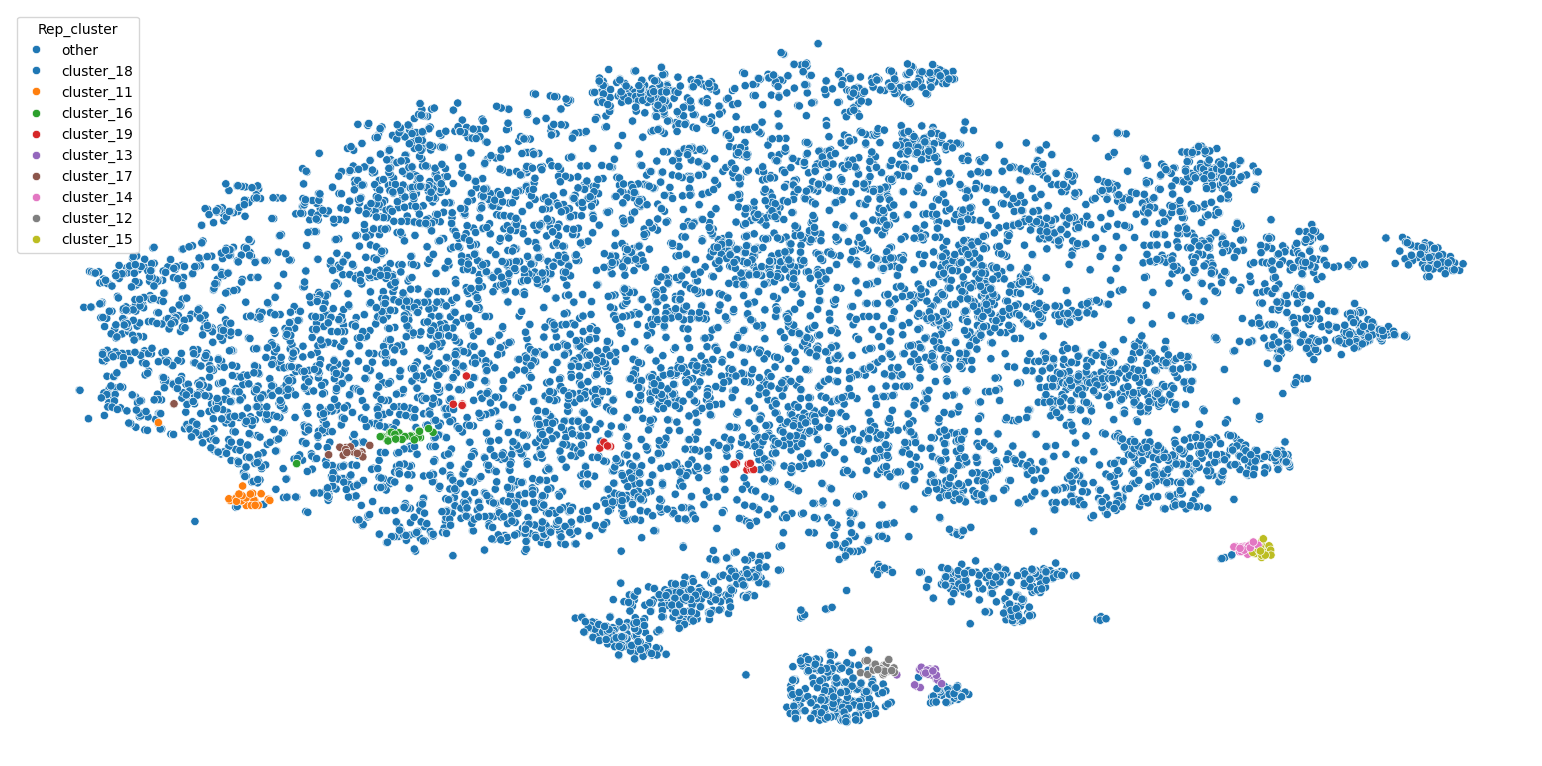

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from src import generate_embedding_tsnes_with_thumbnails

FIGURE_SAVE_PATH = "reports/figures/outfit_tsne.png"

embeddings_df["rep_cluster"] = embeddings_df["cluster"].apply(lambda x: f"cluster_{x}" if 10 < x < 20 else "other")
tsne_original_df, scatter_original_plot, tsne = generate_embedding_tsnes_with_thumbnails.generate_tsne_diagram(embeddings_df, REPRESENTATION_COLUMN, hue_column="rep_cluster", show_plot=True, return_tsne=True, save_path=FIGURE_SAVE_PATH)

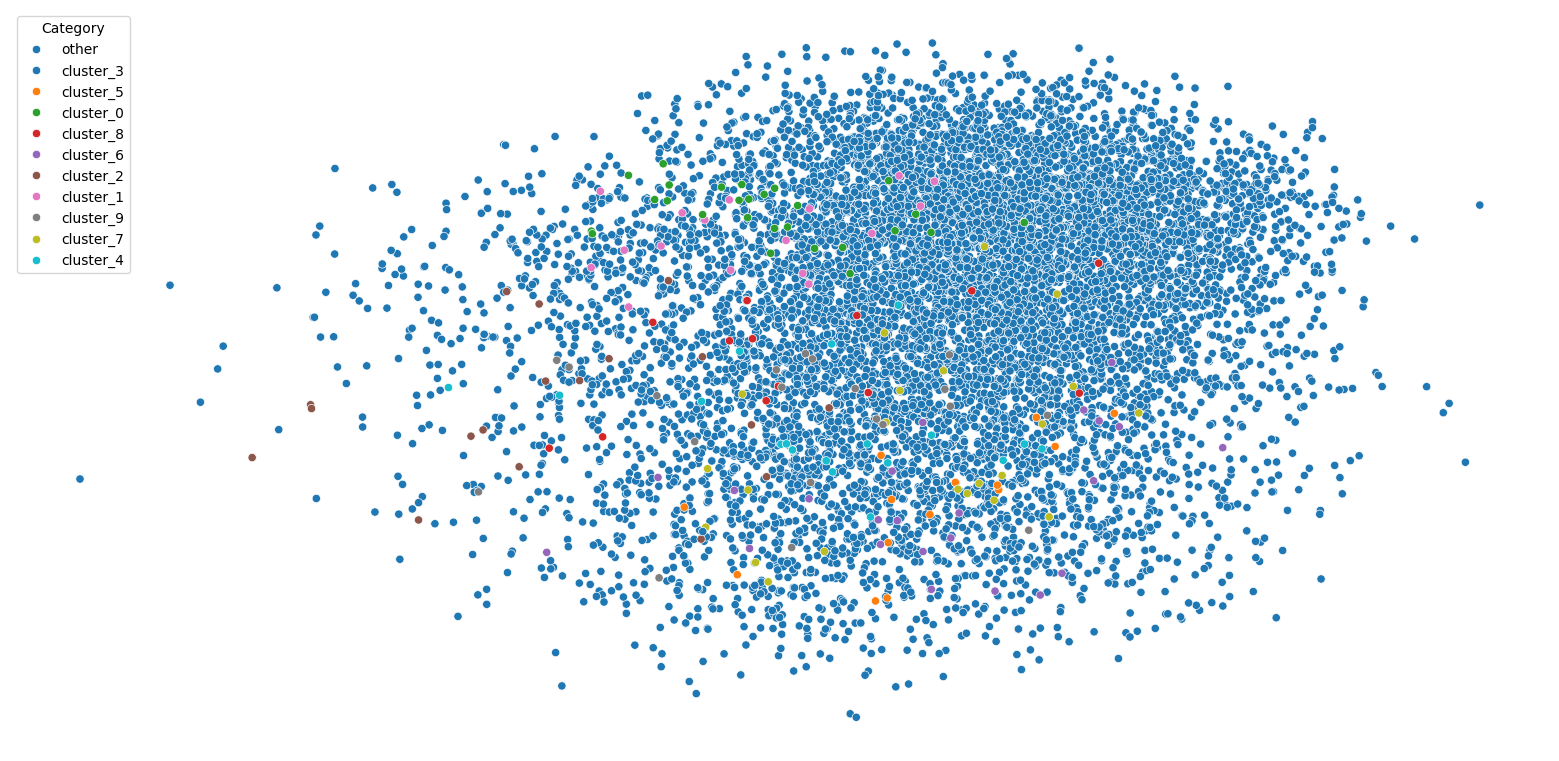

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from src import generate_embedding_tsnes_with_thumbnails

FIGURE_SAVE_PATH = "reports/figures/outfit_tsne.png"

embeddings_df["rep_cluster"] = embeddings_df["cluster"].apply(lambda x: f"cluster_{x}" if x < 10 else "other")
tsne_original_df, scatter_original_plot, svd = generate_embedding_tsnes_with_thumbnails.generate_svd_diagram(embeddings_df, REPRESENTATION_COLUMN, hue_column="rep_cluster", extra_embeddings=None, show_plot=True, return_svd=True, save_path=FIGURE_SAVE_PATH)